# Uncertainty quantification

In [1]:
import numpy as np
import pylab as pl
%pylab --no-import-all inline
import openturns as ot
from openturns.viewer import View

Populating the interactive namespace from numpy and matplotlib


# Introduction

## Step A: problem specification

We study the deviation of a cantilever beam. An external force is applied to the free end of the beam.

![Cantilever beam](http://doc.openturns.org/openturns-latest/html/ExamplesGuide/Figures/poutre.png "Cantilever beam")

The vertical deflection of the free end writes:

\begin{align}
    y =  \dfrac{F\,L^3}{3\,E\,I}
\end{align}

where:

* $E$ is the Young modulus ;
* $F$ is the load ;
* $L$ is the length of the beam ;
* $I$ is the moment of inertia.

## Step B: Quantifying uncertainty sources

The *variable of interest* is the deflection denoted as $y$ that can be estimated thanks to the *model* $\mathcal{M}$ being given the vector of *input variables* $\boldsymbol{x} = (E, F, L, I)$ which are assumed random.

## Step C: Numerical methods for estimating statistical quantities of interest

The output variable $Y = \mathcal{M}(\mathbf{X})$ is now random with unknown distribution. **Open TURNS** implements numerical methods for calculating statistical quantities of interest of that random variable. Two kinds will be investigated in this training:

* **Central dispersion summary statistics** such as the mean $\mu$ and variance $\sigma^2$ of the variable of interest $Y$ (**TP DJ 4**).

\begin{align}
    \mu & = \mathbb{E}\left[Y\right] \\
    \sigma^2 & = \mathbb{E}\left[(Y-\mu)^2\right]
\end{align}

* **Rare event probabilities** such as the probability of exceeding a threshold (**TP DJ4**).

\begin{align}
    \mathbb{P} \left[Y > 30~\text{cm}\right] = 1 - F_Y(30~\text{cm})
\end{align}

where $F_Y$ is the cumulative distribution function characterizing the probability distribution of $Y$.

# Focus on step B: Uncertainty Quantification (TP DJ3)

One seeks to define a model that best represents the distribution of the input random vector $\boldsymbol{X} = (E, F, L, I)$. 

One wants to assess the probability distribution of $\boldsymbol{X}$ described by its joint probability density function. The methods to be used depends on the available information. In this example, the available data are the folowing:

* A set of measurements of the Young modulus $E$ collected in a file; 
* Expert recommandations for the other input variables $F, L$ and $I$

**Open TURNS** provides probabilistic models together with the statistical tools for building them from the available data. 

**Open TURNS** allows to:

* fit probabilistic models to the available sample using either the *maximum likelihood principle* or the *method of moments*,

* validate these estimations with goodness-of-fit tests such as the Kolmogorov-Smirnov test (for continuous distributions) or the Chi-squared test (for discrete distributions) or visual tests such as the QQ-plot.

## Descriptive statistics of the available sample  
 
The CSV file `"sample_E.csv"` containing the list of data is imported in order to obtained a `NumericalSample`, named here `sample_E`.

In [2]:
sample_E = ot.NumericalSample.ImportFromCSVFile("sample_E.csv")
sample_E.setDescription(["Young Modulus"])
sample_E

class=Sample name=sample_E.csv implementation=class=SampleImplementation name=sample_E.csv size=229 dimension=1 description=[Young Modulus] data=[[2.99532e+07],[2.86804e+07],[3.06412e+07],[3.2051e+07],[3.77857e+07],[3.79726e+07],[3.70693e+07],[3.01798e+07],[3.72172e+07],[2.92682e+07],[3.13239e+07],[3.17285e+07],[4.64719e+07],[3.40195e+07],[3.36658e+07],[3.68996e+07],[3.30579e+07],[2.97948e+07],[3.60382e+07],[2.85617e+07],[2.97459e+07],[2.91823e+07],[3.27802e+07],[2.87561e+07],[4.0617e+07],[4.08452e+07],[3.15322e+07],[3.32675e+07],[3.4114e+07],[3.17167e+07],[3.69525e+07],[2.97889e+07],[3.1936e+07],[3.7044e+07],[3.18016e+07],[2.9515e+07],[3.54393e+07],[3.24856e+07],[3.92304e+07],[3.11649e+07],[3.03454e+07],[3.975e+07],[3.37154e+07],[2.89384e+07],[4.43147e+07],[3.60947e+07],[3.02044e+07],[2.974e+07],[3.52444e+07],[3.10205e+07],[2.96336e+07],[3.5151e+07],[2.99969e+07],[3.58994e+07],[2.84796e+07],[2.80765e+07],[2.902e+07],[2.86364e+07],[3.70741e+07],[3.10481e+07],[3.42757e+07],[3.20141e+07],[3.46782e+07],[3.11242e+07],[2.82546e+07],[4.12304e+07],[3.23542e+07],[3.87177e+07],[3.68961e+07],[2.90494e+07],[4.22453e+07],[2.80085e+07],[3.90443e+07],[2.98707e+07],[4.28638e+07],[2.83532e+07],[2.84114e+07],[3.97557e+07],[3.6249e+07],[3.33394e+07],[3.44513e+07],[3.10098e+07],[3.43614e+07],[3.10463e+07],[3.38103e+07],[4.11005e+07],[4.41809e+07],[3.2577e+07],[3.86687e+07],[3.31899e+07],[2.92635e+07],[3.32957e+07],[3.70005e+07],[3.81116e+07],[2.85777e+07],[2.89924e+07],[3.19153e+07],[3.5135e+07],[2.9743e+07],[2.92087e+07],[3.28354e+07],[3.55782e+07],[3.53076e+07],[3.01474e+07],[2.85441e+07],[3.95129e+07],[4.09649e+07],[2.98681e+07],[4.2146e+07],[3.19075e+07],[2.80469e+07],[2.9651e+07],[4.12579e+07],[3.34085e+07],[3.77624e+07],[4.81152e+07],[3.29934e+07],[3.09389e+07],[2.80452e+07],[2.98668e+07],[3.50429e+07],[3.31546e+07],[3.19852e+07],[2.81348e+07],[4.27277e+07],[3.17267e+07],[3.32924e+07],[3.30781e+07],[4.03661e+07],[3.06147e+07],[2.87854e+07],[2.97351e+07],[3.20111e+07],[3.57675e+07],[3.78836e+07],[3.39547e+07],[3.93423e+07],[3.83316e+07],[3.31426e+07],[3.10101e+07],[3.64696e+07],[3.12946e+07],[3.31203e+07],[3.65166e+07],[3.71555e+07],[3.84489e+07],[3.40968e+07],[4.01114e+07],[2.82786e+07],[3.12384e+07],[3.11581e+07],[3.04481e+07],[3.54762e+07],[2.80301e+07],[3.15708e+07],[3.39964e+07],[4.34369e+07],[2.8292e+07],[3.2207e+07],[4.18587e+07],[3.16039e+07],[3.33347e+07],[3.74403e+07],[3.26015e+07],[3.56502e+07],[4.2998e+07],[4.01155e+07],[2.86151e+07],[2.9522e+07],[4.54748e+07],[3.71747e+07],[2.94455e+07],[3.57448e+07],[4.15252e+07],[3.52914e+07],[2.82637e+07],[3.36726e+07],[3.31362e+07],[3.34293e+07],[3.55484e+07],[3.35183e+07],[3.44917e+07],[3.44091e+07],[3.64067e+07],[2.97875e+07],[3.44597e+07],[4.04117e+07],[4.51695e+07],[3.63177e+07],[3.12662e+07],[3.04494e+07],[3.16392e+07],[4.21101e+07],[2.94444e+07],[3.25488e+07],[3.38303e+07],[2.84375e+07],[3.30854e+07],[2.94702e+07],[2.99494e+07],[2.94376e+07],[3.68562e+07],[3.48882e+07],[3.90951e+07],[2.96325e+07],[2.97218e+07],[3.31437e+07],[3.94263e+07],[2.97439e+07],[4.28031e+07],[4.03214e+07],[3.3691e+07],[3.19569e+07],[2.87947e+07],[4.01986e+07],[3.51678e+07],[4.37273e+07],[2.8324e+07],[4.42419e+07],[3.01403e+07],[3.15868e+07],[2.95289e+07],[2.94565e+07],[2.80796e+07],[3.28485e+07],[3.12094e+07],[3.21182e+07],[2.92928e+07],[2.87602e+07]]

The `NumericalSample` object is dotted with methods for computing summary statistics of the sample.

In [3]:
print " Size                  = %d"    % sample_E.getSize()
print " Mean                  = %.12g" % sample_E.computeMean()[0]
print " Variance              = %.12g" % sample_E.computeCovariance()[0, 0]
print " Standard deviation    = %.12g" % sample_E.computeStandardDeviation()[0, 0]
print " Skewness              = %.12g" % sample_E.computeSkewness()[0]
print " Kurtosis              = %.12g" % sample_E.computeKurtosis()[0]
print " Median                = %.12g" % sample_E.computeQuantile(.5)[0]
print " Interquartile         = [%.12g, %.12g]" % (sample_E.computeQuantile(0.25)[0], sample_E.computeQuantile(0.75)[0])
print " Range                 = [%.12g, %.12g]" % (sample_E.getMin()[0], sample_E.getMax()[0])

 Size                  = 229
 Mean                  = 33874362.4266
 Variance              = 2.06583353131e+13
 Standard deviation    = 4545144.14657
 Skewness              = 0.799366290074
 Kurtosis              = 2.89010920118
 Median                = 33085407.5372
 Interquartile         = [29870018.0704, 36896931.4922]
 Range                 = [28008548.0287, 48115184.6478]


Open TURNS is also dotted with methods to compute empirical approximations of the PDF and CDF.

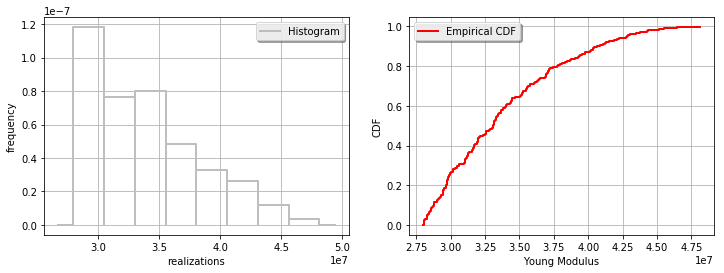

In [4]:
fig = pl.figure(figsize=(12, 4))
ax_pdf = fig.add_subplot(1, 2, 1)
hist_E = ot.VisualTest_DrawHistogram(sample_E)
hist_E.setColors(["gray"])
hist_E.setLegends(["Histogram"])
_ = View(hist_E, figure=fig, axes=[ax_pdf])

ax_cdf = fig.add_subplot(1, 2, 2)
ecdf_E = ot.VisualTest_DrawEmpiricalCDF(sample_E, sample_E.getMin()[0], sample_E.getMax()[0])
ecdf_E.setLegends(["Empirical CDF"])
_ = View(ecdf_E, figure=fig, axes=[ax_cdf])

# Fitting probability distributions

The objective is to estimate the parameters of a **supposed parametric distribution** from the sample.

## Parametric models

**Open TURNS** implements the main probability distributions (Beta, Normal, etc.).

In [5]:
distribution = ot.Beta(2., 4., -1., 1.)

In [6]:
mean = distribution.getMean()
print "mean_value = %s" % mean[0]
print "pdf_value_at_mean = %s" % distribution.computePDF(mean)
print "cdf_value_at_mean = %s" % distribution.computeCDF(mean)
distribution.getSample(10)

mean_value = 0.0
pdf_value_at_mean = 0.75
cdf_value_at_mean = 0.5


class=Sample name=Beta implementation=class=SampleImplementation name=Beta size=10 dimension=1 description=[X0] data=[[0.185797],[-0.575611],[-0.2198],[0.699733],[-0.741229],[0.313232],[-0.180466],[0.614619],[0.719458],[0.267306]]

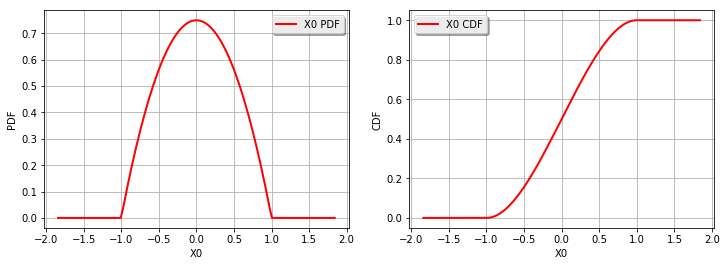

In [7]:
fig = pl.figure(figsize=(12, 4))
ax_pdf = fig.add_subplot(1, 2, 1)
ax_cdf = fig.add_subplot(1, 2, 2)
_ = View(distribution.drawPDF(), figure=fig, axes=[ax_pdf])
_ = View(distribution.drawCDF(), figure=fig, axes=[ax_cdf])

## Fitting a parametric model

**Open TURNS** implements estimators (named "factories") for each parametric models. Each `Factory` selects the best-suited estimation technique (either the Maximum Likelihood method, the method of moments or other distribution-specific methods).

In [8]:
fitted_E = ot.BetaFactory().build(sample_E)

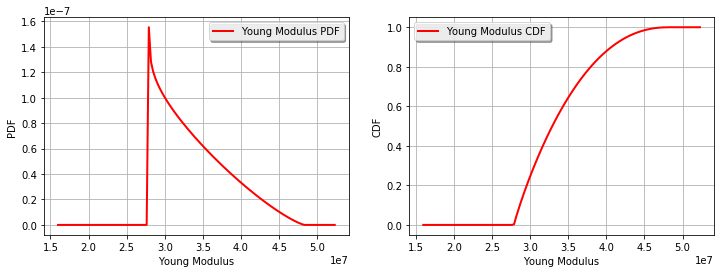

In [9]:
fig = pl.figure(figsize=(12, 4))
ax_pdf = fig.add_subplot(1, 2, 1)
ax_cdf = fig.add_subplot(1, 2, 2)
_ = View(fitted_E.drawPDF(), figure=fig, axes=[ax_pdf])
_ = View(fitted_E.drawCDF(), figure=fig, axes=[ax_cdf])

In [10]:
print fitted_E.getParametersCollection()

[[r : 0.933837, t : 3.18755, a : 2.78873e+07, b : 4.83235e+07]]


## Goodness-of-fit tests

Statistical tools enables to validate (or invalidate) the choice of a distribution given a set of data. Among these tests are:
- parametric tests,
- visual tests.

We introduce here one test of each type:
- the Kolmogorov-Smirnov test,
- the QQ-plot.

Let's test if the sample `sample_E` is distributed according to the given distribution (Null Hypothesis). 

### Kolmogorov-Smirnov test

They are tested by means of `ot.FittingTest.Kolmogorov` that takes as argument the sample `sample_E`, the tested distribution `fitted_E` and the **specificity** of the test. A $0.95$ specifity correponds to an admitted risk of type I error $\alpha = 5 \%$.

`ot.FittingTest.Kolmogorov` returns a `TestResult` object.

In [11]:
kstest_result = ot.FittingTest.Kolmogorov(sample_E, fitted_E, 1. - .05)
print kstest_result.getDescription()[0]
print "p-value = %.2e" % kstest_result.getPValue()
if kstest_result.getBinaryQualityMeasure():
    print "KS test cannot reject the null hypothesis with significance level %.2f." % kstest_result.getThreshold()
else:
    print "KS test rejects the null hypothesis with significance level %.2f." % kstest_result.getThreshold()

Beta(r = 0.933837, t = 3.18755, a = 2.78873e+07, b = 4.83235e+07) vs sample sample_E.csv
p-value = 9.56e-01
KS test cannot reject the null hypothesis with significance level 0.05.


### QQ-plot

The quantile-quantile plot is a visual goodness-of-fit test. For each point of the numerical sample used in the graph, Open Turns evaluates its empirical quantile and associates to it the corresponding quantile from the fitted distribution.

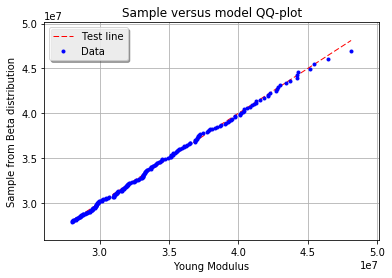

In [12]:
QQ_plot = ot.VisualTest_DrawQQplot(sample_E, fitted_E)
QQ_plot.setXTitle(sample_E.getDescription()[0])
QQ_plot.setYTitle("Sample from %s distribution" % fitted_E.getClassName())
_ = View(QQ_plot)

## Non-parametric fitting

The *kernel smoothing* of the probability density function of a distribution is obtained thanks to the following formula in dimension 1:

$f_{KS}(x) = \dfrac{1}{N\,h} \sum \limits_{i=1}^N K \left( \dfrac{x-x^{(i)}}{h} \right)$

where $h$ is the bandwidth and $K$ is the univariate kernel satisfying $\int K(x) =1$.

The **Open TURNS** implementation of this technique yields a complete distribution (equivalent to the other parametric distributions).

In [13]:
kernel = ot.Normal()
kernel_smoothing = ot.KernelSmoothing(kernel)
bandwidth = kernel_smoothing.computeSilvermanBandwidth(sample_E)
smoothed_E = kernel_smoothing.build(sample_E, bandwidth)

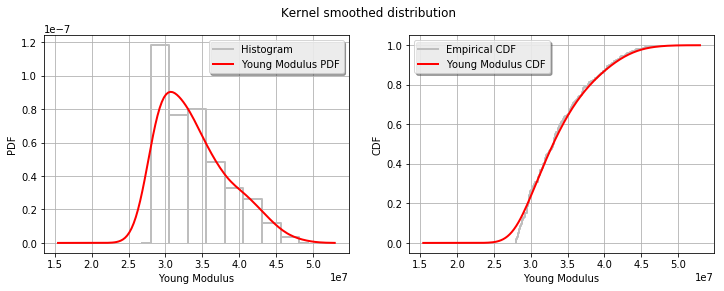

In [14]:
fig = pl.figure(figsize=(12, 4))
fig.suptitle('Kernel smoothed distribution')
ax_pdf = fig.add_subplot(1, 2, 1)
hist_E = ot.VisualTest_DrawHistogram(sample_E).getDrawable(0)
hist_E.setColor('gray')
hist_E.setLegend('Histogram')
_ = View(hist_E, figure=fig, axes=[ax_pdf])
_ = View(smoothed_E.drawPDF(), figure=fig, axes=[ax_pdf])
ax_cdf = fig.add_subplot(1, 2, 2)
ecdf_E = ot.VisualTest_DrawEmpiricalCDF(sample_E, sample_E.getMin()[0], sample_E.getMax()[0]).getDrawable(0)
ecdf_E.setColor('gray')
ecdf_E.setLegend('Empirical CDF')
_ = View(ecdf_E, figure=fig, axes=[ax_cdf])
_ = View(smoothed_E.drawCDF(), figure=fig, axes=[ax_cdf])

## Comparaison of the proposed distributions

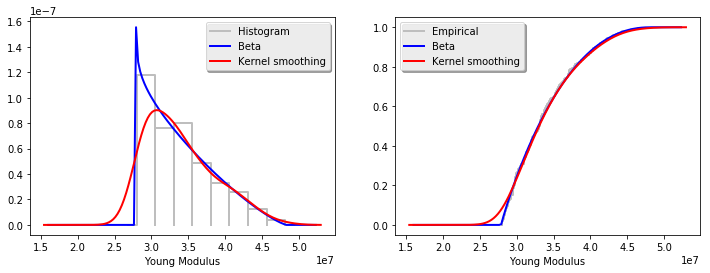

In [15]:
fig = pl.figure(figsize=(12, 4))

hist_pdf = ot.VisualTest_DrawHistogram(sample_E).getDrawable(0)
hist_pdf.setColor("gray")
hist_pdf.setLegend("Histogram")
fitted_pdf = fitted_E.drawPDF().getDrawable(0)
fitted_pdf.setColor("blue")
fitted_pdf.setLegend(fitted_E.getClassName())
smoothed_pdf = smoothed_E.drawPDF().getDrawable(0)
smoothed_pdf.setColor("red")
smoothed_pdf.setLegend("Kernel smoothing")
graph_pdf = ot.Graph()
graph_pdf.add([hist_pdf, fitted_pdf, smoothed_pdf])
graph_pdf.setBoundingBox([2e7,5.1e7,0,1.7e-7])
graph_pdf.setLegendPosition("topright")
graph_pdf.setXTitle(sample_E.getDescription()[0])

ax_pdf = fig.add_subplot(1, 2, 1)
_ = View(graph_pdf, figure=fig, axes=[ax_pdf])

ecdf = ot.VisualTest_DrawEmpiricalCDF(sample_E, sample_E.getMin()[0], sample_E.getMax()[0]).getDrawable(0)
ecdf.setColor("gray")
ecdf.setLegend("Empirical")
fitted_cdf = fitted_E.drawCDF().getDrawable(0)
fitted_cdf.setColor("blue")
fitted_cdf.setLegend(fitted_E.getClassName())
smoothed_cdf = smoothed_E.drawCDF().getDrawable(0)
smoothed_cdf.setColor("red")
smoothed_cdf.setLegend("Kernel smoothing")
graph_cdf = ot.Graph()
graph_cdf.add([ecdf, fitted_cdf, smoothed_cdf])
graph_cdf.setBoundingBox([2.e7,5.1e7,0,1.])
graph_cdf.setLegendPosition("topleft")
graph_cdf.setXTitle(sample_E.getDescription()[0])

ax_cdf = fig.add_subplot(1, 2, 2)
_ = View(graph_cdf, figure=fig, axes=[ax_cdf])

# Definition of the input parameters probabilistic model

In [16]:
dim = 4

# Young modulus E : kernel smoothed distribution
E = smoothed_E

# loading F: lognormal
F = ot.LogNormal()
F.setParameter(ot.LogNormalMuSigma()([30000., 9000., 15000.]))
F.setDescription(['Load'])

# Length L: uniform
L = ot.Uniform(250., 260.)
L.setDescription(['Length'])

# Inertia I: beta
I = ot.Beta(2.5, 4, 310, 450)
I.setDescription(['Inertia'])

# Creation of a copula : Normal copula of dimension 3 from Spearman rank correlation matrix
SR_cor = ot.CorrelationMatrix(dim)
SR_cor[2,3] = -0.2


copula = ot.NormalCopula(ot.NormalCopula.GetCorrelationFromSpearmanCorrelation(SR_cor))


# Create the distribution
X_distribution = ot.ComposedDistribution([E, F, L, I], copula)
X_distribution.setDescription(("E", "F", "L", "I"))

X_random_vector = ot.RandomVector(X_distribution)

4. Definition of the physical modal
--------------------------------

In [17]:
model = ot.Function(['E', 'F', 'L', 'I'],['v'], ['F*L^3/(3*E*I)'])

Y_random_vector = ot.RandomVector(model,X_random_vector)

In [18]:
N = 1000

In [19]:
ot.RandomGenerator.SetSeed(0)

In [20]:
Y_sample = Y_random_vector.getSample(N)

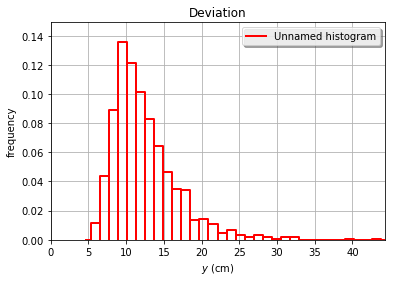

In [21]:
Y_mean_sample = Y_sample.computeMean()[0]
Y_std_sample = np.sqrt(Y_sample.computeCovariance()[0,0])
y_min  = Y_mean_sample - 4 * Y_std_sample
y_max = Y_mean_sample + 4 * Y_std_sample
sample_Y_hist = ot.VisualTest_DrawHistogram(Y_sample)
sample_Y_hist.setXTitle("$y$ (cm)")
sample_Y_hist.setTitle("Deviation")
_ = View(sample_Y_hist, bar_kwargs={'label':'Y sample'})

In [22]:
Y_mean_sample

12.446574277572708

5. Representation of 2 marginals
----------------------------------

** $E$ Young modulus**

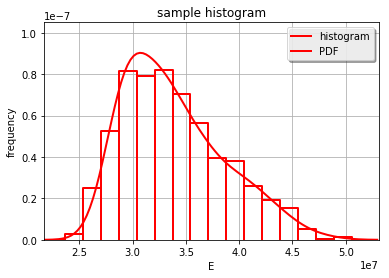

In [23]:
X_variable = X_distribution.getMarginal(0)
X_sample = X_variable.getSample(1000)

bounding_box = ot.NumericalPoint([X_variable.computeQuantile(1e-5)[0],X_variable.computeQuantile(1. - 1e-5)[0],0.,1.05e-7])
X_sample_hist = ot.VisualTest_DrawHistogram(X_sample)
X_sample_hist.setBoundingBox(bounding_box)
X_sample_hist.setLegends(["histogram"])
X_sample_hist.setXTitle(X_variable.getDescription()[0])
X_PDF_draw = X_variable.drawPDF()
X_PDF_draw.setLegends(["PDF"])
X_PDF_draw.setBoundingBox(bounding_box)
X_sample_hist.add(X_PDF_draw)
_ = View(X_sample_hist)

** $F$: Loading **

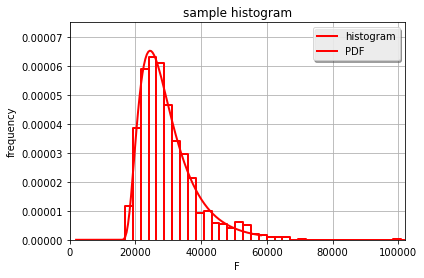

In [24]:
X_variable = X_distribution.getMarginal(1)
X_sample = X_variable.getSample(1000)

bounding_box = ot.NumericalPoint([X_variable.computeQuantile(1e-2)[0],X_variable.computeQuantile(1. - 1e-2)[0],0.,0.000075])

X_sample_hist = ot.VisualTest_DrawHistogram(X_sample)
X_sample_hist.setLegends(["histogram"])
X_sample_hist.setXTitle(X_variable.getDescription()[0])

X_PDF_draw = X_variable.drawPDF()
X_PDF_draw.setLegends(["PDF"])
X_PDF_draw.setBoundingBox(bounding_box)
X_sample_hist.add(X_PDF_draw)
_ = View(X_sample_hist)

### Représentation en 2D

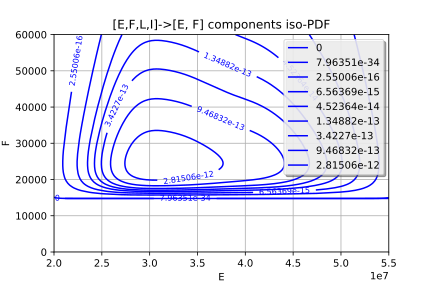

In [25]:
marginal1 = 0 # E
marginal2 = 1 # F
X_distribution.drawMarginal2DPDF(marginal1, marginal2, [2e7, 0], [5.5e7, 60000], [200, 200])